In [ ]:
import numpy as np
from sympy import Matrix
from sympy import symbols
from sympy import lambdify
from sympy.solvers import solve

## Task 1: Golden ratio line search

In [ ]:
#Newest WORKS I THINK

def gsSearch(f,x=0,d=0,eps=10e-5):
  ''' perform golden ratio search
      input:
        f - the function to be evaluated
        x - current iteration optimization variable
        d - direction to search
        eps - small number that serves to terminate the search
      output:
        alpha - parameter to multiply by d to calculate the next x
  '''
  
#################################
# Start entering your code here #
#################################
  phi = 0.5*(1+np.sqrt(5))  #define golden number
  tau = 1/phi               #inverse of golden number
  d = d[0]                  #get the given d out of the array of one
  delta = 0.05              #set delta to 0.05
  xa = x                    #set initial Xa
  xd = x                    #set initial Xd
  disp = xd - xa            #measure initial distance between Xa and Xd
  a = delta                 #set initial alpha to delta
  #to avoid creating a list I will only keep track of the last 3 alphas calculated
  #alpha minus 1 (am1) alpha minus 2 (am2) and alpha (a)
  am1 = a                   #set initial alpha minus 1 to alpha
  am2 = a                   #set initial alpha minus 2 to alpha

  if f(x) > f(x + a*d):
    q = 1
    while f(x + am1*d) > f(x + am2*d) and f(x + am1*d) > f(x + a*d):
      am2 = am1
      am1 = a
      a = delta*tau**q
      q += 1
  xa = x + am2*d
  xd = x + a*d
  j = 0
  while np.linalg.norm(disp) > eps:
    disp = xd - xa
    dist = disp*d
    xb = xa + (1-tau)
    xc = xa + tau
    if f(xb) > f(xc):
      xd = xc
    if f(xb) <= f(xc):
      xa = xb
    if j > 100000:
      print('Excedes allowed iterations:', j)
      break
    j += 1
  alpha = (xa + xd)/2
  #print('Nearest alpha reached:', alpha)
#################################
# End of your code              #
#################################
  
  return alpha[-1]

## Task 2: Steepest descent

In [ ]:
def sd(f, x=0, der=0, eps=10e-5):
  ''' Steepest descent
      input:
        f - objective function as a python function
        x - initial guess of the optimal solution
        der - analytical derivative of the objective function as a python function
        eps - small number to terminate the algorithm
      output:
        x_out - solution of x from all the iteration (not just the optimal value)
  '''

#################################
# Start entering your code here #
#################################

#now we find the search direction, or the d vector
  x_out=x
  j=0
  c=der(x).T

  while np.linalg.norm(c)>eps and j<1000:
    c=der(x).T[0]
    normalizedD= -c/np.linalg.norm(c)
    d=np.transpose(normalizedD)
    print('d', d)
    print('x', x)
    asteep=gsSearch(f, x, d, eps)
    x=np.add(x, asteep*d)
    x_out=np.vstack([x_out,x])

    j=j+1



  
#################################
# End of your code              #
#################################

  return x_out

## Task 3: Conjugate Gradient

In [ ]:
def cg(f, x=0, der=0, eps=10e-5):
  ''' Conjugate gradient
      input:
        f - objective function as a python function
        x - initial guess of the optimal solution
        der - analytical derivative of the objective function as a python function
        eps - small number to terminate the algorithm
      output:
        x_out - solution of x from all the iteration (not just the optimal value)
  '''

#################################
# Start entering your code here #
#################################

  i = 0
  c0_non_unit = der(x).T
  c0 = c0_non_unit/np.linalg.norm(c0_non_unit)
  d0 = -1*c0
  dist = np.linalg.norm(d0)
  iLim = 100000
  if dist <= eps:
    a = gsSearch(f,x,d0,eps)
    xi1 = np.add(x, a*d0)
    print('ayo')
  else:
    ci = c0
    di = d0
    xi = x
    a = gsSearch(f,xi,d0,eps)
    xi1 = np.add(xi, a*d0[0])
    while dist >= eps:
      cim1 = ci
      dim1 = di
      c_non_unit = der(xi).T
      ci = c_non_unit/np.linalg.norm(c_non_unit)
      bi = np.divide(np.matmul(ci, ci.T), np.matmul(cim1, cim1.T))
      di = np.add(-1*ci, bi*dim1)
      xi = xi1
      a = gsSearch(f,xi,di,eps)
      xi1 = np.add(xi, a*di)
      xi1 = xi1[0]
      i += 1
      dist = np.linalg.norm(ci)
      if i > iLim:
        print('Excedes allowed iterations:', i)
        print('Nearest answer reached:', xi1)
        break
    #print('Nearest answer reached:', xi1)
    print('Nearest alpha reached:', a)
    x_out = xi1
  
#################################
# End of your code              #
#################################

  return [x_out]

## Task 4: Modified Newton Method

In [ ]:
def mn(f, x=0, der=0, hes=0, eps=10e-5):
  ''' Modified Newton Method
      input:
        f - objective function as a python function
        x - initial guess of the optimal solution
        der - analytical derivative of the objective function as a python function
        hes - analytical hessian of the objective function as a python function
        eps - small number to terminate the algorithm
      output:
        x_out - solution of x from all the iteration (not just the optimal value)
  '''

#################################
# Start entering your code here #
#################################

  i = 0
  c_non_unit = der(x).T
  c = c_non_unit/np.linalg.norm(c_non_unit)
  iLimit = 100000
  x1 = x
  while np.linalg.norm(c) > eps:
    Hi = hes(x)
    d = -1*c/Hi
    a = gsSearch(f,x,d,eps)
    x1 = x1 + a*d
    c_non_unit = der(x1).T
    c = c_non_unit/np.linalg.norm(c_non_unit)
    i +=1
    if i > iLimit:
      print('Excedes allowed iterations:', i)
      break
  x_out = x1

  
#################################
# End of your code              #
#################################

  return x_out

## Test case 1: Quadratic function

In [ ]:
########################################
# Test case 1
#######################################

# Objective function
def testFun(x):
  return x[0]**2+x[1]**2

# Derivative of the objective function
def testFunDer(x):
  return np.array([[2*x[0]], [2*x[1]]])


# Derivative of the objective function
def testFunHes(x):
  return np.array([[2, 0], [0, 2]])

# execution of your optimization code #
x0 = np.array([-25., 75.])

x_out_sd = sd(testFun,x0,testFunDer,0.00001)
print('Steepest descent gives: ' + str(x_out_sd[-1]))

x_out_cg = cg(testFun,x0,testFunDer,0.00001)
print('Conjugate gradient gives: ' + str(x_out_cg[-1]))

#x_out_mn = mn(testFun,x0,testFunDer,testFunHes, 0.00001)
#print('Modified Newton gives: ' + str(x_out_mn[-1]))

# Check your code against scipy optimize
from scipy.optimize import minimize
res = minimize(testFun, x0)
print('Scipy gives: ' + str(res.x))

#Dont forget to uncomment the code


d [ 0.31622777 -0.9486833 ]
x [-25.  75.]
d [ 0.31622777 -0.9486833 ]
x [-1.21752342  3.65257026]
d [-0.31622777  0.9486833 ]
x [ 0.00291484 -0.00874453]
d [ 0.31622777 -0.9486833 ]
x [-0.04971402  0.14914207]
d [-0.31622777  0.9486833 ]
x [ 0.06284297 -0.18852891]
d [-0.31622777  0.9486833 ]
x [ 0.06706692 -0.20120075]
d [-0.31622777  0.9486833 ]
x [ 0.07529805 -0.22589415]
d [-0.31622777  0.9486833 ]
x [ 0.09133792 -0.27401377]
d [-0.31622777  0.9486833 ]
x [ 0.12259455 -0.36778366]
d [-0.31622777  0.9486833 ]
x [ 0.18350383 -0.55051149]
d [-0.31622777  0.9486833 ]
x [ 0.30219672 -0.90659016]
d [-0.31622777  0.9486833 ]
x [ 0.53349157 -1.60047472]
d [-0.31622777  0.9486833 ]
x [ 0.94688637 -2.8406591 ]
d [-0.31622777  0.9486833 ]
x [ 1.75246189 -5.25738568]
d [-0.31622777  0.9486833 ]
x [ 3.32227347 -9.9668204 ]
d [-0.31622777  0.9486833 ]
x [  6.38133906 -19.14401719]
d [-0.31622777  0.9486833 ]
x [ 12.3424891  -37.02746729]
d [-0.31622777  0.9486833 ]
x [ 23.9588826  -71.87664781]


NameError: ignored

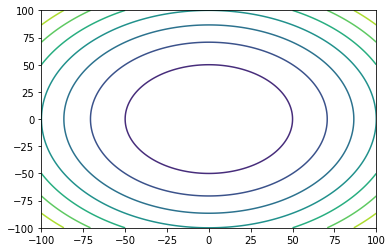

In [ ]:
#######################################
# Test case 1
#######################################

# Plot the contour and the optimization iteration
import matplotlib.pyplot as plt

n = 1000 # calculate for n data points 
val_x = np.linspace(-100.,100., n)  

# meshgrid allows us to weave these two variables to arrive at n^2 points for calculation
optVar_x0, optVar_x1 = np.meshgrid(val_x, val_x)

# Plot the contour map
plt.contour(optVar_x0, optVar_x1, testFun([optVar_x0, optVar_x1]))
# Scatter plot of the iteration of x
plt.scatter(x_out_sd[:,0],x_out_sd[:,1], c='b')
plt.plot   (x_out_sd[:,0],x_out_sd[:,1], c='b')
plt.scatter(x_out_cg[:,0],x_out_cg[:,1], c='r')
plt.plot   (x_out_cg[:,0],x_out_cg[:,1], c='r')
plt.scatter(x_out_mn[:,0],x_out_mn[:,1], c='g')
plt.plot   (x_out_mn[:,0],x_out_mn[:,1], c='g')

plt.show()

## Test case 2: Box optimization

In [ ]:
#######################################
# Test case 2
#######################################

v_req = 10**6

from sympy import symbols
from sympy import lambdify
from sympy import Matrix

# Define optimization variables
a, b = symbols('a b')

# Define the objective to minimize
box  = a*b+2*v_req/b+2*v_req/a 
dBox = Matrix([box.diff(x) for x in [a,b]]) # Calculate gradient
ddBox = Matrix([[y.diff(x) for y in dBox] for x in [a,b]]) # Calculate hessian

# lambdify the objective function
boxF = lambdify([a,b], box)
dBoxF = lambdify([a,b], dBox)
ddBoxF = lambdify([a,b], ddBox)

# Wrapper functions
def boxFW (x):
  return boxF(x[0],x[1])

def dBoxFW (x):
  return dBoxF(x[0],x[1])

def ddBoxFW (x):
  return ddBoxF(x[0],x[1])

# execution of your optimization code #
x0 = np.array([60., 200.])

x_out_sd = sd(boxFW,x0,dBoxFW,0.00001)
print('Steepest descent gives: ' + str(x_out_sd[-1]))

x_out_cg = cg(boxFW,x0,dBoxFW,0.00001)
print('Conjugate gradient gives: ' + str(x_out_cg[-1]))

x_out_mn = mn(boxFW,x0,dBoxFW,ddBoxFW,0.00001)
print('Modified Newton gives: ' + str(x_out_mn[-1]))

# Check your code against scipy optimize
from scipy.optimize import minimize
res = minimize(boxFW, x0)
print('Scipy gives: ' + str(res.x))


Excedes allowed iterations: 100001
Conjugate gradient gives: -3522140919.8878903
Scipy gives: [125.99207898 125.99200824]


In [ ]:
#######################################
# Test case 2
#######################################

n = 1000 # calculate for n data points 
val_x = np.linspace(10., 220., 100)  

# meshgrid allows us to weave these two variables to arrive at n^2 points for calculation
optVar_x0, optVar_x1 = np.meshgrid(val_x, val_x)

import matplotlib.pyplot as plt
# initialize a figure container
fig = plt.figure(figsize=(8, 6))

# Plot the contour map to show objective landscape
plt.contour(optVar_x0, optVar_x1, boxFW([optVar_x0, optVar_x1]))
# Scatter plot of the iteration of x_star values

plt.scatter(x_out_sd[:,0],x_out_sd[:,1], c='b')
plt.plot   (x_out_sd[:,0],x_out_sd[:,1], c='b')
plt.scatter(x_out_cg[:,0],x_out_cg[:,1], c='r')
plt.plot   (x_out_cg[:,0],x_out_cg[:,1], c='r')
plt.scatter(x_out_mn[:,0],x_out_mn[:,1], c='g')
plt.plot   (x_out_mn[:,0],x_out_mn[:,1], c='g')

plt.xlim([50,150])
plt.ylim([100,225])
plt.show()

## Test case 3: Wire optimization

In [ ]:
#######################################
# Test case 3
#######################################

# Set all the parameters
y_start = 50; x_start = 50; x_end = 50; y_end = 350; a = 500; b = 400; t = 75

from sympy import symbols
from sympy import lambdify
from sympy import Matrix
# Define optimization variables
y1, y2 = symbols('y1 y2')

# Define the objective to minimize
length  = ((x_start-a)**2+(y_start-y1)**2)**0.5 + \
          ((y1-y2)**2+t**2)**0.5 + \
          ((a-x_end)**2+(y2-y_end)**2)**0.5

# Calculate gradient then cast to sympy matrix
dLength = Matrix([length.diff(x) for x in [y1,y2]]) 
ddLength = Matrix([[y.diff(x) for y in dLength] for x in [y1,y2]]) # Calculate hessian


# lambdify the objective function and the derivative
lengthF     = lambdify([y1,y2], length)
dLengthF     = lambdify([y1,y2], dLength)
ddLengthF     = lambdify([y1,y2], ddLength)

# define wrapper functions
def lengthFW (x):
  return lengthF(x[0],x[1])

def dLengthFW (x):
  return dLengthF(x[0],x[1])

def ddLengthFW (x):
  return ddLengthF(x[0],x[1])


# execution of your optimization code #
x0 = np.array([20., 200.])
x_out_sd = sd(lengthFW,x0,dLengthFW,0.00001)
print('Steepest descent gives: ' + str(x_out_sd[-1]))

x_out_cg = cg(lengthFW,x0,dLengthFW,0.00001)
print('Conjugate gradient gives: ' + str(x_out_cg[-1]))

x_out_mn = mn(lengthFW,x0,dLengthFW,ddLengthFW,0.00001)
print('Modified Newton gives: ' + str(x_out_mn[-1]))

# Check your code against scipy minimize
from scipy.optimize import minimize
res = minimize(lengthFW, x0)
print('Scipy gives: ' + str(res.x))

In [ ]:
#######################################
# Test case 3
#######################################

import matplotlib.pyplot as plt

# calculate for n data points 
n = 1000 
val_x = np.linspace(0., b, n)  

# meshgrid allows us to weave these two variables to arrive at n^2 points for calculation
optVar_x0, optVar_x1 = np.meshgrid(val_x, val_x)

# initialize a figure container
fig = plt.figure(figsize=(8, 6))

# plot contour to display objective landscape
plt.contour(optVar_x0, optVar_x1, lengthFW([optVar_x0, optVar_x1]))

# plot the iteration x_star values

plt.scatter(x_out_sd[:,0],x_out_sd[:,1], c='b')
plt.plot   (x_out_sd[:,0],x_out_sd[:,1], c='b')
plt.scatter(x_out_cg[:,0],x_out_cg[:,1], c='r')
plt.plot   (x_out_cg[:,0],x_out_cg[:,1], c='r')
plt.scatter(x_out_mn[:,0],x_out_mn[:,1], c='g')
plt.plot   (x_out_mn[:,0],x_out_mn[:,1], c='g')


plt.xlim([0,300])
plt.ylim([100,250])

plt.show()

## Test case 4: Rosenbrock function


In [ ]:
#######################################
# Test case 4
#######################################

# Set all the parameters
a = 0; b = 100;

from sympy import symbols
from sympy import lambdify
from sympy import Matrix
# Define optimization variables
x, y = symbols('x y')

# Define the objective to minimize
rosen = (a-x)**2+b*(y-x**2)**2
dRosen = Matrix([rosen.diff(x) for x in [x,y]]) 
ddRosen = Matrix([[y.diff(x) for y in dRosen] for x in [x,y]]) # Calculate hessian


# lambdify the objective function and the derivative
rosenF    = lambdify([x,y], rosen)
dRosenF   = lambdify([x,y], dRosen)
ddRosenF  = lambdify([x,y], ddRosen)

# define wrapper functions
def rosenFW (x):
  return rosenF(x[0],x[1])

def dRosenFW (x):
  return dRosenF(x[0],x[1])

def ddRosenFW (x):
  return ddRosenF(x[0],x[1])

# execution of your optimization code 
x0 = np.array([-25., 300.])
x_out_sd = sd(rosenFW,x0,dRosenFW,0.0000001)
print('Steepest descent gives: ' + str(x_out_sd[-1]))
x_out_cg = cg(rosenFW,x0,dRosenFW,0.0000001)
print('Conjugate gradient gives: ' + str(x_out_cg[-1]))
x_out_mn = mn(rosenFW,x0,dRosenFW,ddRosenFW,0.0000001)
print('Modified Newton gives: ' + str(x_out_mn[-1]))

# Check your code against scipy optimize
from scipy.optimize import minimize
res = minimize(testFun, x0)
print('Scipy gives: ' + str(res.x))

In [ ]:
#######################################
# Test case 4
#######################################

import matplotlib.pyplot as plt

# calculate for n data points 
n = 10

val_x0 = np.linspace(-20., 20., n)
val_x1 = np.linspace(-200., 400., n)

# meshgrid allows us to weave these two variables to arrive at n^2 points for calculation
optVar_x0, optVar_x1 = np.meshgrid(val_x0, val_x1)

# initialize a figure container
fig = plt.figure(figsize=(8, 6))

# plot contour to display objective landscape
plt.contour(optVar_x0, optVar_x1, rosenFW([optVar_x0, optVar_x1]))

# plot the iteration x_star values
plt.scatter(x_out_sd[:,0],x_out_sd[:,1], c='b')
plt.plot   (x_out_sd[:,0],x_out_sd[:,1], c='b')
plt.scatter(x_out_cg[:,0],x_out_cg[:,1], c='r')
plt.plot   (x_out_cg[:,0],x_out_cg[:,1], c='r')
plt.scatter(x_out_mn[:,0],x_out_mn[:,1], c='g')
plt.plot   (x_out_mn[:,0],x_out_mn[:,1], c='g')

plt.show()